In [2]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [3]:
import os 

In [4]:
os.path.basename(url)

'housing.tgz'

In [6]:
file_path = r"C:\Users\fazlu\Machine Learning Projects\machine-learning-regression-project\config"

In [7]:
!dir file_path

 Volume in drive C is OS
 Volume Serial Number is 1265-CD8A

 Directory of c:\Users\fazlu\Machine Learning Projects\machine-learning-regression-project\notebook



File Not Found


In [8]:
os.listdir(file_path)

['config.yaml']

In [1]:
## data ingestion

In [1]:
import pandas as pd

In [7]:
csv_file_path = r"C:\Users\fazlu\Machine Learning Projects\machine-learning-regression-project\housing\artifact\data_ingestion\22-08-20-15-22-20\raw_data\housing.csv" 

housing_data_frame = pd.read_csv(csv_file_path)

In [5]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

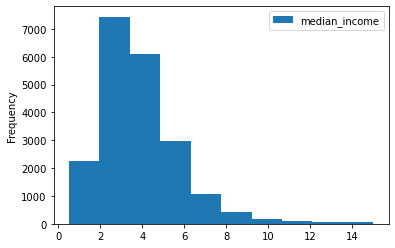

In [8]:
housing_data_frame[['median_income']].plot(kind='hist')

In [9]:
import numpy as np

In [10]:
housing_data_frame['income_cat'] = pd.cut(
                housing_data_frame['median_income'],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [11]:
housing_data_frame.income_cat

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [12]:
housing_data_frame.income_cat.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

([<matplotlib.patches.Wedge at 0x2713f92d220>,
 [Text(0.49759850713241616, 0.9810176989736684, ''),
  Text(-1.0978272902668031, -0.06910311675640082, ''),
  Text(0.052385887306755786, -1.0987518913799803, ''),
  Text(0.9017710292481974, -0.6299277822168561, ''),
  Text(1.0914015713324503, -0.1372683870855143, '')])

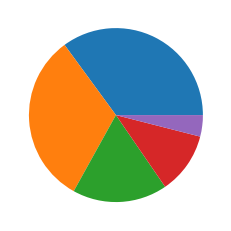

In [13]:
plt.pie(housing_data_frame.income_cat.value_counts()) 

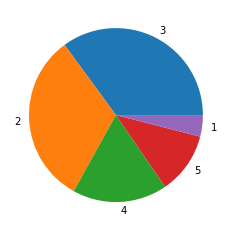

In [14]:
plt.pie(housing_data_frame.income_cat.value_counts(), labels=housing_data_frame.income_cat.value_counts().index) 
plt.show()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit 

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 

In [17]:
split.split(housing_data_frame, housing_data_frame['income_cat'])

<generator object BaseShuffleSplit.split at 0x00000271409AA510>

In [18]:
for train_index, test_index in split.split(housing_data_frame, housing_data_frame['income_cat']):
    print(train_index, test_index)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [19]:
train_df = housing_data_frame.loc[train_index]

In [20]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [21]:
train_df.shape

(16512, 11)

In [22]:
housing_data_frame.shape

(20640, 11)

In [23]:
test_df = housing_data_frame.loc[test_index]

In [24]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [25]:
test_df.shape

(4128, 11)

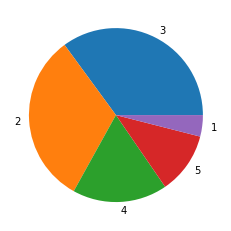

In [26]:
plt.pie(train_df.income_cat.value_counts(), labels=train_df.income_cat.value_counts().index) 
plt.show()

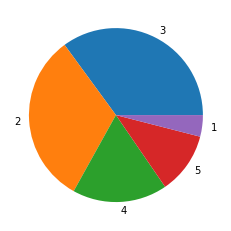

In [27]:
plt.pie(test_df.income_cat.value_counts(), labels=test_df.income_cat.value_counts().index) 
plt.show()

In [28]:
housing_data_frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [31]:
housing_data_frame.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [32]:
housing_data_frame.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object

In [33]:
housing_data_frame.dtypes.index

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [34]:
housing_data_frame.dtypes.index, housing_data_frame.dtypes.values

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 array([dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
       dtype=object))

In [35]:
housing_data_frame.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
      dtype=object)

In [40]:
list(map(lambda x:str(x).replace('dtype(','').replace(')',''),housing_data_frame.dtypes.values))  

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [41]:
data_type = list(map(lambda x:str(x).replace('dtype(','').replace(')',''),housing_data_frame.dtypes.values))  

In [42]:
data_type

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [44]:
column_name = housing_data_frame.columns

In [45]:
column_name

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [46]:
dict(zip(column_name,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}